In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [36]:
movies = pd.read_csv('movies.csv')

In [37]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
rates = pd.merge(ratings, movies, left_on='movieId', right_on='movieId', how='left')
rates.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [39]:
rates['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [40]:
df = pd.DataFrame(rates.groupby(rates['title'])['rating'].mean())
df.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [41]:
df['Number of Ratings'] = rates.groupby('title')['rating'].count()

In [42]:
df.head()

,rating,Number of Ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


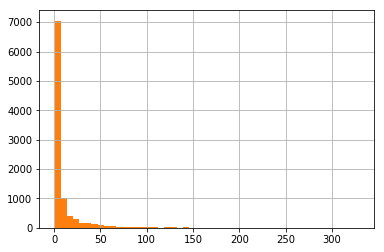

In [91]:
df['rating'].hist(bins=50)
df['Number of Ratings'].hist(bins=50)  #we see that there are many movies that do not have more than 100 reviews

In [44]:
import seaborn as sb


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


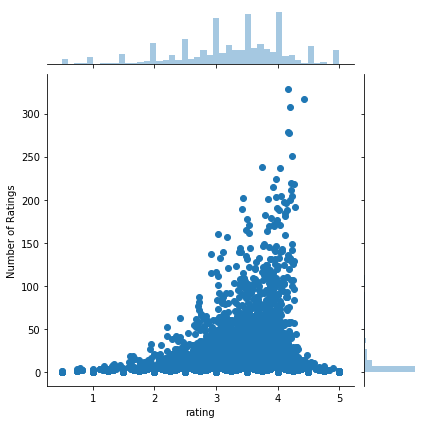

In [45]:
sb.jointplot(x='rating', y='Number of Ratings', data=df)


In [47]:
# mm = rates.sort_values(by=['title', 'rating'])


rating                                          \
title  '71 (2014) 'Hellboy': The Seeds of Creation (2004)   
userId                                                      
1             NaN                                     NaN   
2             NaN                                     NaN   
3             NaN                                     NaN   
4             NaN                                     NaN   
5             NaN                                     NaN   

                                                                             \
title  'Round Midnight (1986) 'Salem's Lot (2004) 'Til There Was You (1997)   
userId                                                                        
1                         NaN                 NaN                       NaN   
2                         NaN                 NaN                       NaN   
3                         NaN                 NaN                       NaN   
4                         NaN                 NaN                       NaN   
5                         NaN                 NaN                       NaN   

                                                           \
title  'Tis the Season for Love (2015) 'burbs, The (1989)   
userId                                                      
1                                  NaN                NaN   
2                                  NaN                NaN   
3                                  NaN                NaN   
4                                  NaN                NaN   
5                                  NaN                NaN   

                                                         \
title  'night Mother (1986) (500) Days of Summer (2009)   
userId                                                    
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   
5                       NaN                         NaN   

                                       \
title  *batteries not included (1987)   
userId                                  
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   
5                                 NaN   

                          ...                                              \
title                     ...                    Zulu (2013) [REC] (2007)   
userId                    ...                                               
1                         ...                            NaN          NaN   
2                         ...                            NaN          NaN   
3                         ...                            NaN          NaN   
4                         ...                            NaN          NaN   
5                         ...                            NaN          NaN   

                                              \
title  [REC]² (2009) [REC]³ 3 Génesis (2012)   
userId                                         
1                NaN                     NaN   
2                NaN                     NaN   
3                NaN                     NaN   
4                NaN                     NaN   
5                NaN                     NaN   

                                                                               \
title  anohana: The Flower We Saw That Day - The Movie (2013) eXistenZ (1999)   
userId                                                                          
1                                                     NaN                 NaN   
2                                                     NaN                 NaN   
3                                                     NaN                 NaN   
4                                                     NaN                 NaN   
5                            

In [63]:
mm = rates.pivot_table(index='userId', columns='title', values='rating')
mm.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [64]:
# df.sort_values('Number of Ratings', ascending=False).head(10)

In [65]:
mov = mm['(500) Days of Summer (2009)']
mov.value_counts()

4.0    15
4.5     6
3.5     6
5.0     5
2.5     4
3.0     2
1.5     1
2.0     1
1.0     1
0.5     1
Name: (500) Days of Summer (2009), dtype: int64

In [68]:
mov2 = mm['*batteries not included (1987)']
# cur['rating'].describe()
mov2.value_counts()

3.5    3
3.0    2
4.0    1
2.5    1
Name: *batteries not included (1987), dtype: int64

In [73]:
##Finds the correlation between 500 days of summer and the other movies


corr500 = mm.corrwith(mov)


In [74]:
corr

title
'71 (2014)                                                                                       NaN
'Hellboy': The Seeds of Creation (2004)                                                          NaN
'Round Midnight (1986)                                                                           NaN
'Salem's Lot (2004)                                                                              NaN
'Til There Was You (1997)                                                                        NaN
'Tis the Season for Love (2015)                                                                  NaN
'burbs, The (1989)                                                                          0.997176
'night Mother (1986)                                                                             NaN
(500) Days of Summer (2009)                                                                 1.000000
*batteries not included (1987)                                                       

In [75]:
##Finds the correlation between *batteries not included and the other movies

corrbat = mm.corrwith(mov2)
corrbat

title
'71 (2014)                                                                                       NaN
'Hellboy': The Seeds of Creation (2004)                                                          NaN
'Round Midnight (1986)                                                                           NaN
'Salem's Lot (2004)                                                                              NaN
'Til There Was You (1997)                                                                        NaN
'Tis the Season for Love (2015)                                                                  NaN
'burbs, The (1989)                                                                          0.500000
'night Mother (1986)                                                                             NaN
(500) Days of Summer (2009)                                                                 0.944911
*batteries not included (1987)                                                       

In [82]:
## created a new column with the correlations and droped all of the null values 
## The null values show the the movies that were not rated by the users

corr_500 = pd.DataFrame(corr500, columns=['Correlation'])
corr_500.dropna(inplace=True)
# corr_500.head()
corr_500.sort_values(by='Correlation',ascending=False)

,Correlation
title,
Red Rock West (1992),1.0
Think Like a Man (2012),1.0
"Batman: The Dark Knight Returns, Part 1 (2012)",1.0
"Nightmare on Elm Street, A (1984)",1.0
"Crush, The (1993)",1.0
The Shape of Water (2017),1.0
The Spectacular Now (2013),1.0
"Fabulous Baker Boys, The (1989)",1.0
Newsies (1992),1.0


In [83]:
## created a new column with the correlations and droped all of the null values 
## The null values show the the movies that were not rated by the users


corr_batt = pd.DataFrame(corrbat, columns=['Correlation'])
corr_batt.dropna(inplace=True)
# corr_batt.head()
corr_batt.sort_values(by='Correlation',ascending=False)

,Correlation
title,
In Bruges (2008),1.0
"Incredible Hulk, The (2008)",1.0
Batman Returns (1992),1.0
Lara Croft: Tomb Raider (2001),1.0
Super Mario Bros. (1993),1.0
Poltergeist (1982),1.0
"Bamba, La (1987)",1.0
Pitch Black (2000),1.0
Cocoon: The Return (1988),1.0


In [85]:
## add the number of rainting columns to the correlations data frames

corr_500 = corr_500.join(df['Number of Ratings'])
corr_batt = corr_batt.join(df['Number of Ratings'])

In [89]:
## Sets a threshold: if there are more than 100 ratings for a movie, then keep

corr_500[corr_500['Number of Ratings'] > 100].sort_values(by='Correlation')

,Correlation,Number of Ratings
title,,
Crimson Tide (1995),-8.685990e-01,103
Clear and Present Danger (1994),-5.000000e-01,110
Heat (1995),-4.494666e-01,102
GoldenEye (1995),-3.452381e-01,132
Austin Powers: The Spy Who Shagged Me (1999),-3.326263e-01,121
Outbreak (1995),-3.100868e-01,101
Clerks (1994),-2.817322e-01,104
One Flew Over the Cuckoo's Nest (1975),-2.809757e-01,133
"Mask, The (1994)",-2.281963e-01,157


In [90]:
## Sets a threshold: if there are more than 100 ratings for a movie, then keep

corr_batt[corr_batt['Number of Ratings'] > 100].sort_values(by='Correlation')

,Correlation,Number of Ratings
title,,
Clear and Present Danger (1994),-1.000000,110
Braveheart (1995),-1.000000,237
American Pie (1999),-1.000000,103
Batman Forever (1995),-1.000000,137
Gladiator (2000),-1.000000,170
Goodfellas (1990),-0.973329,126
Crimson Tide (1995),-0.933257,103
Ocean's Eleven (2001),-0.866025,119
Cliffhanger (1993),-0.866025,101
